In [ ]:
#-------------------------------------------------- Assignment - 01 -----------------------------------------------------#

In [2]:
import pandas as pd
import igraph as ig

# Load dataset 
file_path = "./BIOGRID-ORGANISM-Homo_sapiens-4.4.218.tab3.txt"         # Note: Path to the file is hardcoded update the path while running

# Read dataset
data = pd.read_csv(file_path, sep="\t", low_memory=False)

# Extract columns
edges = data[['Entrez Gene Interactor A', 'Entrez Gene Interactor B']].dropna()

# Convert valid numeric values by replacing non-numeric ones with NaN
edges['Entrez Gene Interactor A'] = pd.to_numeric(edges['Entrez Gene Interactor A'], errors='coerce')
edges['Entrez Gene Interactor B'] = pd.to_numeric(edges['Entrez Gene Interactor B'], errors='coerce')

# Droping NaN values
edges = edges.dropna().astype(int)

# Convert list
edge_list = list(zip(edges["Entrez Gene Interactor A"], edges["Entrez Gene Interactor B"]))

# Create an undirected graph using igraph
G = ig.Graph.TupleList(edge_list, directed=False)

print("Graph Loaded Successfully!")
print(f"Number of Nodes: {G.vcount()}")
print(f"Number of Edges: {G.ecount()}")


Graph Loaded Successfully!
Number of Nodes: 27848
Number of Edges: 1134670


In [4]:
# Question 1: For each node compute the degree and identify top 10 hub nodes.

# Computing degree of each node
degrees = G.degree()

# Top 10 nodes with highest degree
top_10_hubs = sorted(zip(G.vs["name"], degrees), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Hub Nodes (Highest Degree):")
for node, deg in top_10_hubs:
    print(f"Protein {node}: Degree {deg}")


Top 10 Hub Nodes (Highest Degree):
Protein 43740578: Degree 12000
Protein 5071: Degree 5954
Protein 7157: Degree 5398
Protein 1956: Degree 4889
Protein 4609: Degree 4510
Protein 54764: Degree 4413
Protein 8452: Degree 4049
Protein 3845: Degree 4037
Protein 899: Degree 3695
Protein 7316: Degree 3585


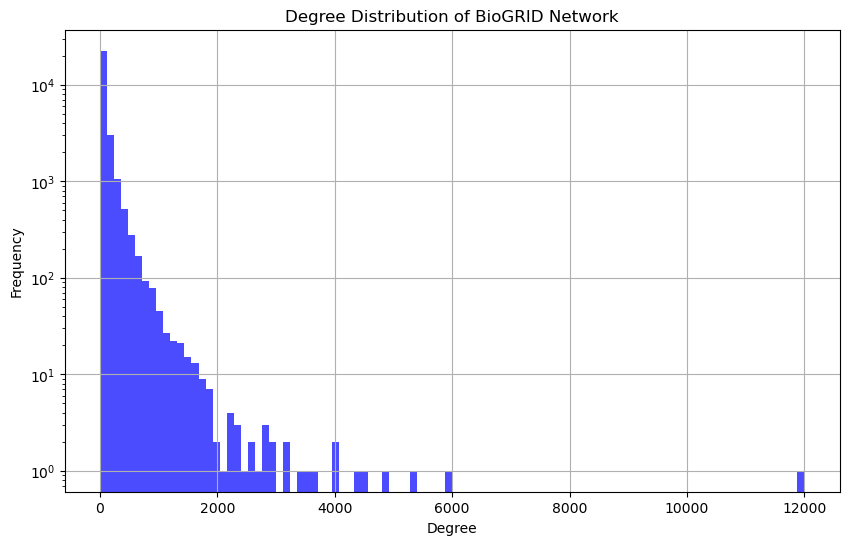

In [7]:
# Question 2: Draw the graph of degree distribution to see if it is a scale free network or not?

import matplotlib.pyplot as plt
import powerlaw

# Plot for degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, color='blue', alpha=0.7)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of BioGRID Network")
plt.yscale('log') 
plt.grid(True)
plt.show()


Calculating best minimal value for power law fit
Estimated power-law exponent (gamma): 3.367103700361787
Power-law vs Exponential: R=26.371099419923468, p=0.030227429899136852


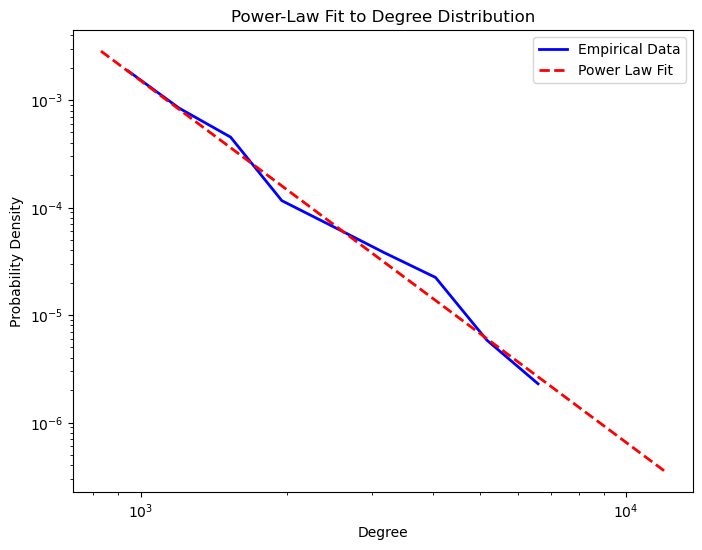

In [8]:
# Power-law fitting to check if the network is scale-free
fit = powerlaw.Fit(degrees)
print(f"Estimated power-law exponent (gamma): {fit.alpha}")

# Power-law vs exponential fit comparision
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Power-law vs Exponential: R={R}, p={p}")

# Plot for power-law fit
plt.figure(figsize=(8,6))
fit.plot_pdf(color='b', linewidth=2, label='Empirical Data')
fit.power_law.plot_pdf(color='r', linestyle='--', linewidth=2, label='Power Law Fit')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.title("Power-Law Fit to Degree Distribution")
plt.show()


In [12]:
# Question 3: Compute the shortest path for all node pairs and plot the distribution of shortest path length.

import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Computing shortest path lengths for all pairs
print("Computing shortest path lengths")
shortest_paths = G.shortest_paths()

# Converting the matrix into a single list
path_lengths = [length for row in shortest_paths for length in row if length < float('inf')]

print(f"Shortest paths computed! Total paths analyzed: {len(path_lengths)}")


Computing shortest path lengths


C:\Users\mmsid\AppData\Local\Temp\ipykernel_11420\3790482815.py:10: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  shortest_paths = G.shortest_paths()


Shortest paths computed! Total paths analyzed: 775344028


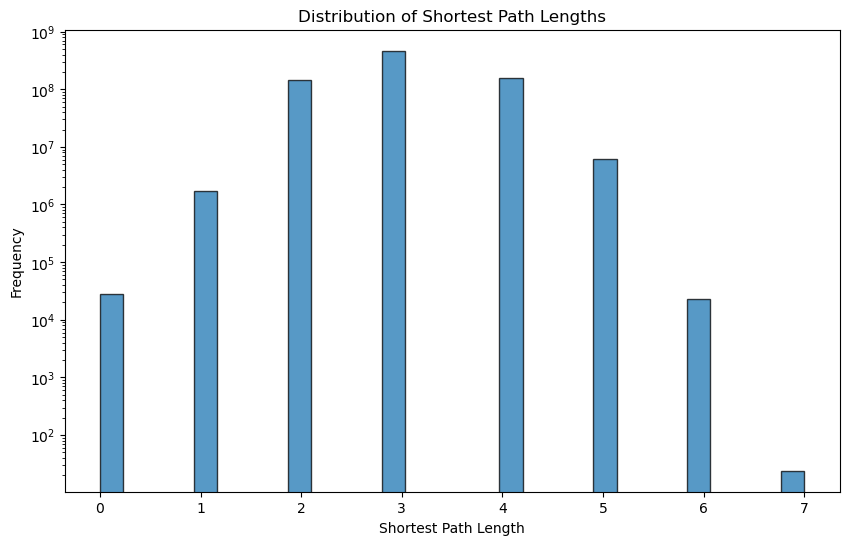

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plot for shortest path lengths
shortest_path_lengths = np.array(path_lengths, dtype=np.int32) 
plt.figure(figsize=(10, 6))
plt.hist(shortest_path_lengths, bins=30, alpha=0.75, edgecolor='black')
plt.xlabel("Shortest Path Length")
plt.ylabel("Frequency")
plt.title("Distribution of Shortest Path Lengths")
plt.yscale('log') 
plt.show()


In [17]:
# Question 4: For each node, compute its betweenness and closeness, and identify top 10 nodes with highest betweenness and closeness respectively. 

from igraph import Graph

# Computing betweenness and closeness
betweenness = G.betweenness(directed=False)
closeness = G.closeness()

# Top 10 nodes
top_10_betweenness = sorted(enumerate(betweenness), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness = sorted(enumerate(closeness), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Nodes by Betweenness Centrality:", top_10_betweenness)
print("Top 10 Nodes by Closeness Centrality:", top_10_closeness)


Top 10 Nodes by Betweenness Centrality: [(24833, 22744355.794518538), (1988, 18075501.634862106), (8254, 17208990.83000888), (147, 16578083.77738637), (2260, 11924420.185736349), (101, 10340120.092920352), (6611, 9897384.060843017), (437, 9745672.422829254), (673, 8891632.72300223), (17, 8662558.25781677)]
Top 10 Nodes by Closeness Centrality: [(8199, 0.4912231180424466), (24833, 0.4891777933942375), (2260, 0.4858404145800981), (101, 0.4829751435361052), (739, 0.47891296869625044), (1077, 0.4767889861127759), (5943, 0.4759495401866603), (437, 0.4750968314365178), (10196, 0.473472996871174), (6611, 0.4688331368917326)]
